In [72]:
import numpy as np
from matplotlib import pyplot as plt

In [73]:
def checkDiagonallyDominant(x):
    x = np.array(x)
    diag = np.diag(np.abs(x))

    sumWithDiagonal = np.sum(np.abs(x), axis=1)
    sumWithoutDiagonal = sumWithDiagonal - diag

    if np.all(sumWithoutDiagonal > diag):
        return False
    else:
        return True

In [74]:
def gaussSeidel(x, y, epsilon, limit):
    x = np.array(x)
    y = np.array(y)

    diag = np.diag(np.abs(x))
    sumWithDiagonal = np.sum(np.abs(x), axis=1)
    sumWithoutDiagonal = sumWithDiagonal - diag

    if np.all(sumWithoutDiagonal > diag):
        return False
    
    oldValue = np.zeros(x.shape[0])
    diagonal = np.diag(x)
    x = -x
    np.fill_diagonal(x, 0)

    for i in range(limit):
        newValue = np.array(oldValue)

        for j, row in enumerate(x):
            newValue[j] = (y[j] + np.dot(row, newValue))/diagonal[j]

        distance = np.sqrt(np.sum(np.dot(newValue-oldValue, newValue-oldValue)))

        if(distance < epsilon):
            return newValue
        
        oldValue = newValue

    return False

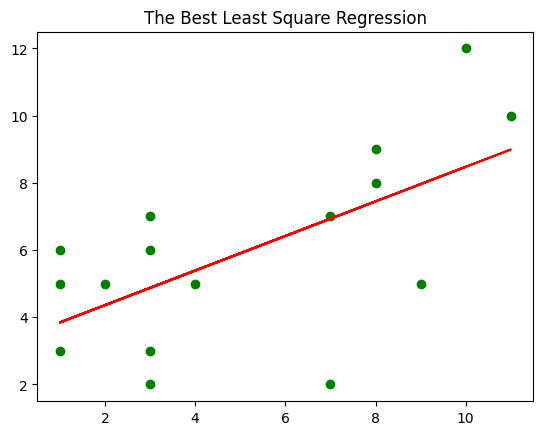

In [75]:
x = [3,1,7,3,1,8,10,3,9,11,3,7,8,1,4,2]
y = [2,5,2,3,6,8,12,7,5,10,6,7,9,3,5,5]

x = np.array(x)
y = np.array(y)

A = np.vstack([x, np.ones(len(x))]).T
Y = np.vstack(y)

hasilInvers = np.linalg.inv(np.dot(A.T, A))
beta = np.dot(np.dot(hasilInvers, A.T), Y)

m = beta[0]
b = beta[1]

y_garis = m * x + b

plt.plot(x, y, 'go')
plt.plot(x, y_garis, "r-")
plt.title("The Best Least Square Regression")

plt.show()

In [76]:
def newtonRaphson(f, df, x0, tolerance, max):
    if(max <= 0 ):
        print("Max Iteration Reached")
        return
    
    if np.abs(f(x0)) < tolerance:
        print(f"Founded: {x0}")
        return
    
    return newtonRaphson(f, df, x0 - (f(x0)/df(x0)), tolerance, max-1)

In [77]:
from sympy import*

x = symbols('x')

f = lambda x:  7*x**4 - 3*x**2 + x
df = diff(f(x), x)
df = lambdify(x, df, 'numpy')
# df = lambda x: 28*x**3 - 6*x + 1

f2 = lambda x: 8*x**6 + 5*x**4 - 2
df2 = diff(f2(x), x)
df2 = lambdify(x, df2, 'numpy')

x0 = 1
tolerance = 0.006541
max = 5

newtonRaphson(f, df, x0, tolerance,  max)
newtonRaphson(f2, df2, x0, tolerance, max)


Max Iteration Reached
Founded: 0.6903195287760319


In [78]:
a = -4
b = 3
n = 30

boxWidth = (b-a)/(n-1)
x = np.linspace(a, b, n)

def f(x):
    return 3*x**4 - 7 *x**2 + 5

xLeft = x[:-1]
yLeft = f(xLeft)
leftRiemann = boxWidth * np.sum(np.abs(yLeft))
print(f"Left Riemann Sum: {leftRiemann}")

xRight = x[1:]
yRight = f(xRight)
rightRiemann = boxWidth * np.sum(np.abs(yRight))
print(f"Right Riemann Sum: {rightRiemann}")

xMid = (xLeft + xRight)/2
yMid = f(xMid)
midRiemann = boxWidth * np.sum(np.abs(yMid))
print(f"Mid Riemann Sum: {midRiemann}")

trapezoid = np.sum(np.abs(yLeft) + np.abs(yRight))/2 * boxWidth
print(f"Trapezoid Sum: {trapezoid}")


Left Riemann Sum: 645.1387652149571
Right Riemann Sum: 530.2422134908192
Mid Riemann Sum: 580.4556464297783
Trapezoid Sum: 587.690489352888
